<a href="https://colab.research.google.com/github/Sharko123/SharkDataExploration/blob/main/SharkImageDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls


drive  sample_data


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, InputLayer
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, BatchNormalization
import seaborn as sns

In [ ]:
sharkPath = "/Users/kubersarwal/Downloads/sharks"

In [ ]:
sharkTypes = ["whitetip", "white", "whale", "tiger", "thresher", "sand tiger", "nurse", "mako", "lemon", "hammerhead", "bull", "blue", "blacktip", "basking"]

In [ ]:
def categorical_to_oneHot(labels_in):
  out = []
  for label in labels_in:
    inp = np.zeros(len(sharkTypes))
    i = sharkTypes.index(label)
    inp[i] = 1
    out.append(inp)
  return np.array(out)

In [ ]:
test = sharkTypes.copy()
categorical_to_oneHot(test)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
for i in sharkTypes:
  print(sharkPath + "/" + i)

/Users/kubersarwal/Downloads/sharks/whitetip
/Users/kubersarwal/Downloads/sharks/white
/Users/kubersarwal/Downloads/sharks/whale
/Users/kubersarwal/Downloads/sharks/tiger
/Users/kubersarwal/Downloads/sharks/thresher
/Users/kubersarwal/Downloads/sharks/sand tiger
/Users/kubersarwal/Downloads/sharks/nurse
/Users/kubersarwal/Downloads/sharks/mako
/Users/kubersarwal/Downloads/sharks/lemon
/Users/kubersarwal/Downloads/sharks/hammerhead
/Users/kubersarwal/Downloads/sharks/bull
/Users/kubersarwal/Downloads/sharks/blue
/Users/kubersarwal/Downloads/sharks/blacktip
/Users/kubersarwal/Downloads/sharks/basking


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(os.path.join(folder,filename))
        print(type(cv2.imread(os.path.join(folder,filename))))
        img = cv2.imread(os.path.join(folder,filename))
        img = resize(img, (150, 150, 3))
        if img is not None:
            images.append(img)
    return np.array(images)

In [ ]:
print(type(cv2.imread("/content/drive/MyDrive/SharkData/sharks/white/00000089.jpg")))

<class 'numpy.ndarray'>


In [ ]:
path = "/content/drive/MyDrive/SharkData/sharks/"
encoded = []
allImages = []
for i in sharkTypes:
  images = load_images_from_folder(path+i)
  if i == sharkTypes[0]:
    allImages = images ;
  else:
    allImages = np.concatenate((allImages, images))
  labels = len(images) * [i]
  if i == sharkTypes[0]:
    encoded = categorical_to_oneHot(labels);
  else:
    encoded = np.vstack((encoded,categorical_to_oneHot(labels)))

/content/drive/MyDrive/SharkData/sharks/whitetip/00000001.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000002.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000000.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000003.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000013.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000012.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000035.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000046.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000023.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000081.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000054.jpg
<class 'numpy.ndarray'>
/content/drive/MyDrive/SharkData/sharks/whitetip/00000

In [ ]:
data = np.asarray(allImages)
np.savez_compressed('data.npz', data)

In [ ]:
data = np.asarray(encoded)
np.savez_compressed('out.npz', data)

In [ ]:
dict_data = np.load('data.npz')
allImages = dict_data['arr_0']

In [ ]:
dict_data = np.load('out.npz')
encoded = dict_data['arr_0']

In [ ]:
allImages1 = allImages.reshape(1549, 150*150*3)
encoded1 = np.array(list(map(lambda x : x.argmax(), encoded)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allImages1, encoded1, test_size=0.33, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test, y_pred))

0.23828125


In [ ]:
model = Sequential()
#adding CNN layers
model.add(Conv2D(150, (3, 3), padding='same'))
model.add(Conv2D(100, (3, 3), padding='same'))
model.add(Conv2D(50, (3, 3), padding='same'))
#flattening CNN output
model.add(Flatten())
#input layer
model.add(InputLayer(input_shape = (150,150,3)))
#add layers
model.add(Dense(5, activation = "relu"))
#output layer
model.add(Dense(14, activation = "softmax"))
#compiling model
model.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
allImages = allImages.reshape((1549, 150, 150, 3))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allImages, encoded, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(1037, 150, 150, 3)

In [ ]:
y_train.shape

(1037, 14)

In [ ]:
y_pred = model.predict(X_test)

NameError: ignored

In [ ]:
for i in range(5):
  print(f"GOT: {y_pred[i]}")
  print(f"Expected: {y_test[i]}")
  plt.figure()
  plt.imshow(X_test[i])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 10)

Epoch 1/150
104/104 [==============================] - 21s 60ms/step - loss: 36.8002 - accuracy: 0.0897 - val_loss: 14.8312 - val_accuracy: 0.0703
Epoch 2/150
104/104 [==============================] - 5s 44ms/step - loss: 7.0945 - accuracy: 0.1119 - val_loss: 10.0051 - val_accuracy: 0.1055
Epoch 3/150
104/104 [==============================] - 5s 45ms/step - loss: 5.2681 - accuracy: 0.1186 - val_loss: 9.7760 - val_accuracy: 0.0625
Epoch 4/150
104/104 [==============================] - 5s 45ms/step - loss: 3.9800 - accuracy: 0.1340 - val_loss: 3.0507 - val_accuracy: 0.1055
Epoch 5/150
104/104 [==============================] - 5s 45ms/step - loss: 3.5259 - accuracy: 0.1398 - val_loss: 3.0215 - val_accuracy: 0.1855
Epoch 6/150
104/104 [==============================] - 5s 47ms/step - loss: 3.0204 - accuracy: 0.1283 - val_loss: 2.6079 - val_accuracy: 0.1387
Epoch 7/150
104/104 [==============================] - 5s 45ms/step - loss: 2.9250 - accuracy: 0.1475 - val_loss: 2.5962 - val_accur

In [ ]:
y_pred = model.predict(X_test)

16/16 [==============================] - 1s 17ms/step


In [ ]:
for i in range(20):
  print(f"GOT: {sharkTypes[(y_pred[i]).argmax()]}")
  print(f"Expected: {sharkTypes[y_test[i].argmax()]}")
  plt.figure()
  plt.imshow(X_test[i])
  plt.show()


In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    if hasattr(history, 'history_'):
      history = history.history_
    else:
      history = history.history
    history.update({'epoch':list(range(len(history['val_loss'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_loss', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_loss', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'loss', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loss (Fraction)')

    plt.show()

In [ ]:
history

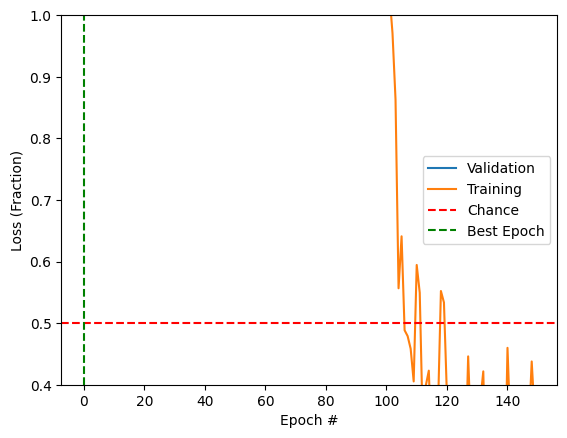

In [ ]:
plot_acc(history)